# Person of interest

## Load packages

In [1]:
## Loading the packages

import pickle
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from feature_format import featureFormat, targetFeatureSplit

In [2]:
#We clean the dataset and select the features that interest us at first. For a start, we hypothetize that 
#salary shoud have a relation to POI as well as bonus should
features_list = ['poi','salary'] 

In [3]:
# We create the dataset reading the file:
data_dt = pickle.load(open("final_SDA.pkl", "rb") )

In [5]:
# Converting the given pickled Enron data to a pandas dataframe to be able to read it in a stylized way
enron_df = pd.DataFrame.from_records(list(data_dt.values()))

# set the index of df to be the employees series:
employees = pd.Series(list(data_dt.keys()))
enron_df.set_index(employees, inplace=True)
enron_df.head()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,...,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
METTS MARK,365788,807,NaN,1061827,NaN,600000,mark.metts@enron.com,NaN,NaN,585062,...,38,NaN,29,1740,1,False,NaN,702,585062,NaN
BAXTER JOHN C,267102,NaN,1295738,5634343,NaN,1200000,NaN,NaN,-1386055,10623258,...,NaN,6680544,NaN,2660303,NaN,False,1586055,NaN,3942714,NaN
ELLIOTT STEVEN,170941,NaN,NaN,211725,NaN,350000,steven.elliott@enron.com,NaN,-400729,6678735,...,NaN,4890344,NaN,12961,NaN,False,NaN,NaN,1788391,NaN
CORDES WILLIAM R,NaN,764,NaN,NaN,NaN,NaN,bill.cordes@enron.com,NaN,NaN,1038185,...,10,651850,12,NaN,0,False,NaN,58,386335,NaN
HANNON KEVIN P,243293,1045,NaN,288682,NaN,1500000,kevin.hannon@enron.com,NaN,-3117011,6391065,...,32,5538001,32,11350,21,True,1617011,1035,853064,NaN


In [6]:
features = ["salary", "bonus"]
data_dt.pop("TOTAL")

{'salary': 26704229,
 'to_messages': 'NaN',
 'deferral_payments': 32083396,
 'total_payments': 309886585,
 'loan_advances': 83925000,
 'bonus': 97343619,
 'email_address': 'NaN',
 'restricted_stock_deferred': -7576788,
 'deferred_income': -27992891,
 'total_stock_value': 434509511,
 'expenses': 5235198,
 'from_poi_to_this_person': 'NaN',
 'exercised_stock_options': 311764000,
 'from_messages': 'NaN',
 'other': 42667589,
 'from_this_person_to_poi': 'NaN',
 'poi': False,
 'long_term_incentive': 48521928,
 'shared_receipt_with_poi': 'NaN',
 'restricted_stock': 130322299,
 'director_fees': 1398517}

In [7]:
data = featureFormat(data_dt, features)

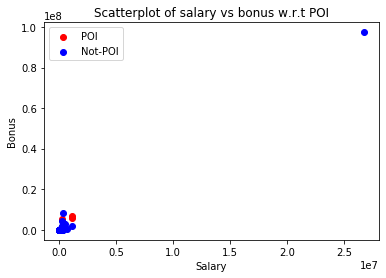

/Users/alvaroma/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  app.launch_new_instance()


'TOTAL'

In [8]:
#We detect here that there's an anomaly

enron_df_new = enron_df.apply(lambda x : pd.to_numeric(x, errors = 'coerce')).copy().fillna(0)

plt.scatter(enron_df_new['salary'][enron_df_new['poi'] == True],enron_df_new['bonus'][enron_df_new['poi'] == True], color = 'r',
           label = 'POI')
plt.scatter(enron_df_new['salary'][enron_df_new['poi'] == False],enron_df_new['bonus'][enron_df_new['poi'] == False],color = 'b',
           label = 'Not-POI')
    
plt.xlabel("Salary")
plt.ylabel("Bonus")
plt.title("Scatterplot of salary vs bonus w.r.t POI")
plt.legend(loc='upper left')
plt.show() 
# And detect that the problem is "TOTAL"
enron_df_new['salary'].argmax()

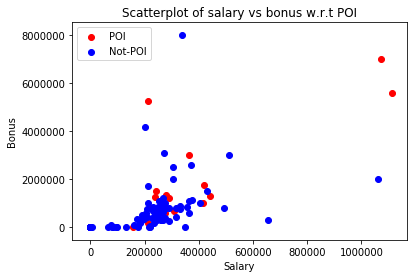

In [9]:
# Thus we take out Total and plot it
enron_df_new.drop('TOTAL', axis = 0, inplace = True)

# Drawing scatterplot with the modified dataframe
plt.scatter(enron_df_new['salary'][enron_df_new['poi'] == True],enron_df_new['bonus'][enron_df_new['poi'] == True], color = 'r',
           label = 'POI')
plt.scatter(enron_df_new['salary'][enron_df_new['poi'] == False],enron_df_new['bonus'][enron_df_new['poi'] == False],color = 'b',
           label = 'Not-POI')
    
plt.xlabel("Salary")
plt.ylabel("Bonus")
plt.title("Scatterplot of salary vs bonus w.r.t POI")
plt.legend(loc='upper left')
plt.show() 


In [10]:
# Finding out the integer index locations of POIs and non-POIs
poi_rs = []
non_poi_rs = []
for i in range(len(enron_df_new['poi'])):
    if enron_df_new['poi'][i] == True:
        poi_rs.append(i+1)
    else:
        non_poi_rs.append(i+1)

print ("length poi list : ",len(poi_rs))
print ("length non-poi list : ",len(non_poi_rs))

length poi list :  18
length non-poi list :  127


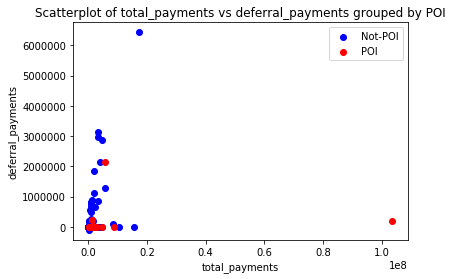

/Users/alvaroma/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


'FREVERT MARK A'

In [11]:
#Let's further dig now into deferred income by making a scatterplot of payments to deferral to check for anomalies
plt.scatter(enron_df_new['total_payments'][enron_df_new['poi'] == False],
            enron_df_new['deferral_payments'][enron_df_new['poi'] == False],
            color = 'b', label = 'Not-POI')

plt.scatter(enron_df_new['total_payments'][enron_df_new['poi'] == True],
            enron_df_new['deferral_payments'][enron_df_new['poi'] == True],
            color = 'r', label = 'POI')

    
plt.xlabel('total_payments')
plt.ylabel('deferral_payments')
plt.title("Scatterplot of total_payments vs deferral_payments grouped by POI")
plt.legend(loc='upper right')
plt.show() 

# Mmmm interesting to find there's some anomaly around it. So let's find out what it is about and drop it
# Finding the non-POI employee having maximum 'deferral_payments'
enron_df_new['deferral_payments'].argmax()

In [12]:
# Finding the non-POI employee having maximum 'deferral_payments'
enron_df_new['deferral_payments'].argmax()
#Now we drop it

enron_df_new.drop('FREVERT MARK A', axis = 0, inplace = True)

/Users/alvaroma/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  


## We find out the long term incentives they may have. 

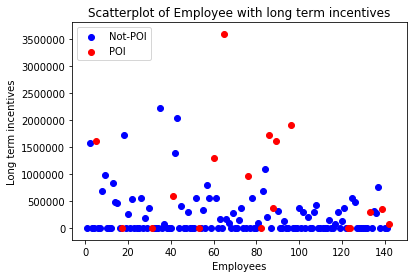

/Users/alvaroma/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


'LAY KENNETH L'

In [45]:
# Finding out the integer index locations of POIs and non-POIs
poi_rs = []
non_poi_rs = []
for i in range(len(enron_df_new['poi'])):
    if enron_df_new['poi'][i] == True:
        poi_rs.append(i+1)
    else:
        non_poi_rs.append(i+1)
plt.scatter(non_poi_rs,
            enron_df_new['long_term_incentive'][enron_df_new['poi'] == False],
            color = 'b', label = 'Not-POI')

plt.scatter(poi_rs,
            enron_df_new['long_term_incentive'][enron_df_new['poi'] == True],
            color = 'r', label = 'POI')

    
plt.xlabel('Employees')
plt.ylabel('Long term incentives')
plt.title("Scatterplot of Employee with long term incentives")
plt.legend(loc='upper left')
plt.show()

enron_df_new['long_term_incentive'].argmax()
#So we find that one of them has a very high incentive, thus we may want to consider taking her out of the picture.

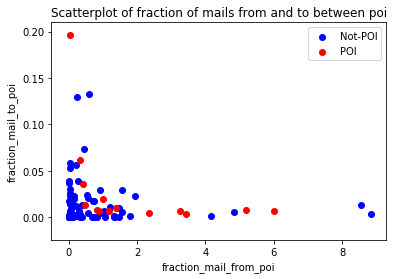

In [74]:
# Scatterplot of fraction of mails from and to between poi and this_person w.r.t POI
enron_df_new['fraction_mail_from_poi'] = enron_df_new['from_poi_to_this_person']/enron_df_new['from_messages'] 
enron_df_new['fraction_mail_to_poi'] = enron_df_new['from_this_person_to_poi']/enron_df_new['to_messages']
plt.scatter(enron_df_new['fraction_mail_from_poi'][enron_df_new['poi'] == False],
            enron_df_new['fraction_mail_to_poi'][enron_df_new['poi'] == False],
            color = 'b', label = 'Not-POI')

plt.scatter(enron_df_new['fraction_mail_from_poi'][enron_df_new['poi'] == True],
            enron_df_new['fraction_mail_to_poi'][enron_df_new['poi'] == True],
            color = 'r', label = 'POI')

    
plt.xlabel('fraction_mail_from_poi')
plt.ylabel('fraction_mail_to_poi')
plt.title("Scatterplot of fraction of mails from and to between poi")
plt.legend(loc='upper right')
plt.show() 

In [14]:
enron_df_new.drop('MARTIN AMANDA K', axis = 0, inplace = True)

In [15]:
#Finally, we can also suspect there may be a relationship the bonus and salary, thus we find the ratio. 
#We have learned there's something called "the travel agency in the park" which sounds too misterious. Thus we dig into it


enron_df_new['bonus-to-salary_ratio'] = enron_df_new['bonus']/enron_df_new['salary']

# Features of the index 'THE TRAVEL AGENCY IN THE PARK'
enron_df_new.loc['THE TRAVEL AGENCY IN THE PARK']
#Since it doesn't have valuable information, we will drop it.

salary                            0
to_messages                       0
deferral_payments                 0
total_payments               362096
loan_advances                     0
bonus                             0
email_address                     0
restricted_stock_deferred         0
deferred_income                   0
total_stock_value                 0
expenses                          0
from_poi_to_this_person           0
exercised_stock_options           0
from_messages                     0
other                        362096
from_this_person_to_poi           0
poi                           False
long_term_incentive               0
shared_receipt_with_poi           0
restricted_stock                  0
director_fees                     0
bonus-to-salary_ratio           NaN
Name: THE TRAVEL AGENCY IN THE PARK, dtype: object

In [16]:
enron_df_new.drop('THE TRAVEL AGENCY IN THE PARK', axis = 0, inplace = True)

In [17]:
### Now we can use more features to expand the results

def computeFraction( poi_messages, all_messages ):
    """ given a number messages to/from POI (numerator) 
        and number of all messages to/from a person (denominator),
        return the fraction of messages to/from that person
        that are from/to a POI
   """
    
    if all_messages == 'NaNNaN': # occurred when created additive features (all emails)
        all_messages = 'NaN'
    if poi_messages == 'NaNNaN':
        poi_messages = 'NaN'
    if all_messages == 'NaN':
        return 0
    if poi_messages == 'NaN':
        return 0
    if all_messages == 0:
        return 0
    return 1.*poi_messages/all_messages
    return fraction
    
for name in data_dt:
        poi_msg_to = data_dt[name]['from_poi_to_this_person']
        all_msg_to = data_dt[name]['to_messages']
        data_dt[name]['fraction_from_poi'] = computeFraction(poi_msg_to, all_msg_to)
        poi_msg_from = data_dt[name]['from_this_person_to_poi']
        all_msg_from = data_dt[name]['from_messages']
        data_dt[name]['fraction_to_poi'] = computeFraction(poi_msg_from, all_msg_from)
        poi_msg_all = poi_msg_to + poi_msg_from
        all_msg_all = all_msg_to + all_msg_from
        data_dt[name]['fraction_emails_with_poi'] = computeFraction(poi_msg_all, all_msg_all)

In [81]:
features_list = ["poi","salary","bonus","long_term_incentive","fraction_from_poi","fraction_emails_with_poi","fraction_to_poi", "shared_receipt_with_poi"]

my_dataset = data_dt

data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

# Algorithm application
## We will specifically use four:
### 1. Random forest classifier 
### 2. Decision tree
### 3. Naive bayes
### 4. Support vector

## 1. Random forest classifier

In [84]:
#We start trying the predictors:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test =train_test_split(features, labels, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
algorithm=RandomForestClassifier( n_estimators=12,min_samples_split=5)

algorithm.fit(features_train,labels_train)
pred=algorithm.predict(features_test)
acc=accuracy_score(pred,labels_test)

print("RF accuracy = ", acc)
#Getting precision
print ('precision = ', precision_score(pred,labels_test))
#Getting recall
print ('recall = ', recall_score(pred,labels_test))

RF accuracy =  0.9130434782608695
precision =  0.5
recall =  1.0


## 2. Decision tree

DT ccuracy =  0.8648648648648649
precision =  0.5
recall =  0.4


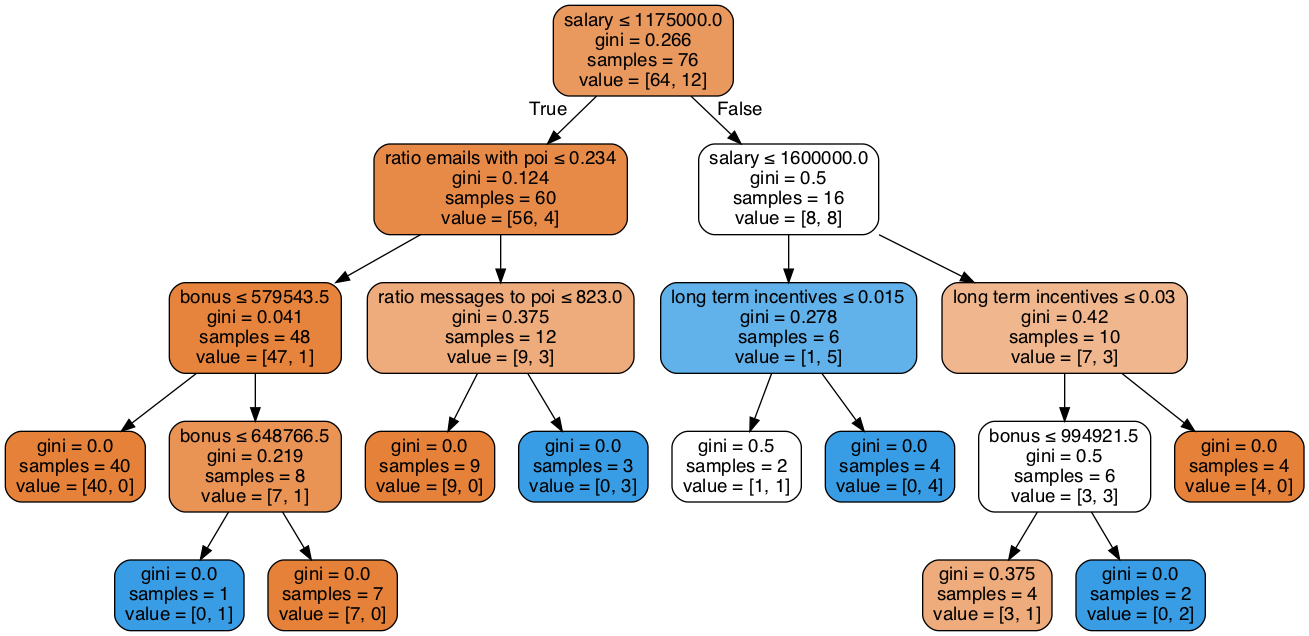

In [86]:
#####
from sklearn.model_selection import KFold
kf=KFold(3,shuffle=False)

for train_indices, test_indices in kf.split(labels):
    #make training and testing sets
    features_train= [features[ii] for ii in train_indices]
    features_test= [features[ii] for ii in test_indices]
    labels_train=[labels[ii] for ii in train_indices]
    labels_test=[labels[ii] for ii in test_indices]

from sklearn.tree import DecisionTreeClassifier

algorithm = DecisionTreeClassifier(min_samples_split=5)
algorithm = algorithm.fit(features_train,labels_train)
pred= algorithm.predict(features_test)
acc=accuracy_score(labels_test, pred)

print ("DT ccuracy = ", acc)

#Getting precision
print ('precision = ', precision_score(labels_test,pred))

#Getting recall
print ('recall = ', recall_score(labels_test,pred))

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(algorithm, out_file=dot_data,feature_names=["poi","salary","bonus","long term incentives","ratio messages from poi","ratio emails with poi","ratio messages to poi"],
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


## 3. Naive Bayes

In [90]:
#####
from sklearn.naive_bayes import GaussianNB
algorithm = GaussianNB()
algorithm.fit(features_train, labels_train)
pred = algorithm.predict(features_test)
accuracy = accuracy_score(pred,labels_test)
print ("NB ccuracy = ",accuracy)
print ('precision = ', precision_score(labels_test,pred))
print ('recall = ', recall_score(labels_test,pred))

from sklearn.metrics import classification_report
print(classification_report(pred,labels_test))

param_grid = {
         'C': [1e3, 5e3, 1e4, 5e4, 1e5],
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
          }

NB ccuracy =  0.8378378378378378
precision =  0.3333333333333333
recall =  0.2
              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91        34
         1.0       0.20      0.33      0.25         3

    accuracy                           0.84        37
   macro avg       0.57      0.61      0.58        37
weighted avg       0.88      0.84      0.86        37



## 4. Support vector machine

In [91]:
#### 

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

algorithm = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
algorithm.fit(features_train, labels_train)
pred = algorithm.predict(features_test)

print ("SVM ccuracy = ", acc)
print ('precision = ', precision_score(labels_test,pred))
print ('recall = ', recall_score(labels_test,pred))

pickle.dump(algorithm, open("my_classifier.pkl", "wb") )
pickle.dump(data_dt, open("my_dataset.pkl", "wb") )
pickle.dump(features_list, open("my_feature_list.pkl", "wb") )

SVM ccuracy =  0.8648648648648649
precision =  0.0
recall =  0.0


/Users/alvaroma/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/alvaroma/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
